In [50]:
import msprime, tskit, time, tsdate, tsinfer
import numpy as np
from IPython.display import SVG
import plotly.io
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import tqdm

In [33]:
lengths = [1e6, 5e6, 1e7, 5e7, 1e8]
samples = 100
res = {}
trees = np.zeros((len(lengths),10))
sim = np.zeros((len(lengths),10))
ext = np.zeros((len(lengths),10))
times = np.zeros((len(lengths),10))
for k in tqdm.tqdm(range(10)):
    for i, L in enumerate(lengths):
        ts = msprime.sim_ancestry(samples, population_size=1000, sequence_length=L,
                                  recombination_rate=1e-8, record_full_arg=True)
        sts = ts.simplify()
        ext_sts = sts.extend_edges()
        trees[i][k] = ts.num_trees
        sim[i][k] = sts.num_edges
        ext[i][k] = ext_sts.num_edges
        
        sts_start = time.time()
        sts.Tajimas_D()
        sts_end = time.time()
        ext_start = time.time()
        ext_sts.Tajimas_D()
        ext_end = time.time()
        times[i][k] = (ext_end-ext_start)/(sts_end-sts_start)

100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [03:17<00:00, 19.80s/it]


## FIGURE:
Two-part figure, showing reduction in number of edges (left) and increase in speed of stats comptuation (right)
        as a function of number of trees (modulated by sequence length),
        on reasonably big simulated sequences.
        For "speed": plot ratio of runtime before/after extending.

In [39]:
tr = np.average(trees, axis=1)
s = np.average(sim,axis=1)
e = np.average(ext,axis=1)
ti = np.average(times,axis=1)

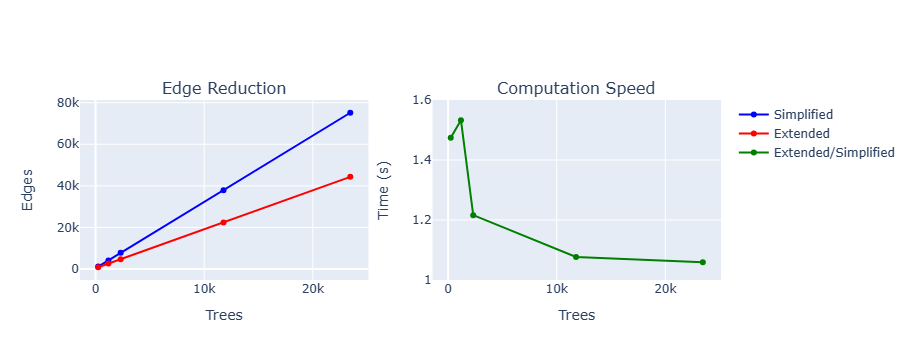

In [48]:
f = make_subplots(rows=1, cols=2, subplot_titles=('Edge Reduction', 'Computation Speed'))
f.add_trace(
    go.Scatter(x=tr, y=s, name='Simplified', mode='lines+markers', marker=dict(color='blue')), 
    row=1,col=1)
f.add_trace(
    go.Scatter(x=tr, y=e, name='Extended', mode = 'lines+markers', marker=dict(color='red'))
    ,row=1, col=1)
f.add_trace(
    go.Scatter(x=tr, y=1/ti, name= 'Extended/Simplified', mode='lines+markers', marker=dict(color='green'))
    , row=1, col=2)
f.update_xaxes(title_text = 'Trees', row=1, col=1)
f.update_xaxes(title_text = 'Trees', row=1, col=2)
f.update_yaxes(title_text = 'Edges', row=1, col=1)
f.update_yaxes(title_text = 'Time (s)', range = (1,1.6), row=1, col=2)
f.show()
plotly.io.write_image(f, 'paper/Edge_reduc_comp_speed.pdf', format='pdf')

In [ ]:
# Simple experiment
